![](./figures/header.png)

**Professor:**
- Dr. Rafael Santos

**Discente:**
- Henrique Mendes Castilho

## Índice

- [1. Introdução](#1.-Introdução)

- [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)



 ## 1. Introdução
 
 <hr />
 
 ## Classificação de Falhas de uma Válvula

Este <em>notebook</em> irá apresentar o projeto da disciplina CAP394 - Data Science. O objetivo principal é classificar o tipo de falha de uma válvula, baseado em sua resposta a um estímulo externo. Este componente é utilizado para regular a pressão pneumática em uma linha de ventilação.


## 2. Exploratory Data Analysis

Para começar a ver os dados, devemos importar algumas bibliotecas.

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from IPython.display import display, HTML

Lendo os dados utilizando o pandas, com os arquivos em formato <em>Comma-Separated Values</em>:

In [37]:
#valve = pd.read_csv('valve_data.csv',names=['T1', 'T2', 'T3', 'T4', 'Class'])
#healthy = pd.read_csv('healthy_curve.csv',names=['Time','Parameter'])
#leaky = pd.read_csv('leaky_curve.csv',names=['Time','Parameter'])

#testPandas = pd.read_csv('testePandas.csv')
#testPandasAngle = pd.read_csv('testePandasTime.csv')
#testPandasTime = pd.read_csv('testePandasAngle.csv')

#Control valve, no failures
times_control = pd.read_csv('data/timeControl.csv', sep=';')
angles_control = pd.read_csv('data/angleControl.csv', sep=';')

#Failure A
times_fail_A = pd.read_csv('data/timeFailA.csv', sep=';')
angles_fail_A = pd.read_csv('data/angleFailA.csv', sep=';')

#Failure B
times_fail_B = pd.read_csv('data/timeFailB.csv', sep=';')
angles_fail_B = pd.read_csv('data/angleFailB.csv', sep=';')

#Failure C
times_fail_C = pd.read_csv('data/timeFailC.csv', sep=';')
angles_fail_C = pd.read_csv('data/angleFailC.csv', sep=';')


Os dados brutos estão divididos em oito arquivos que trabalham em pares: o tempo e o ângulo. Colunas são diferentes testes e as linhas são os instantes de tempo. São quatro classes, cada uma com seu par de dados. A primeira coluna do arquivo de tempo corresponde à primeira coluna do arquivo de ângulo. Isto acontece pois cada par possui um tamanho diferente.

Verifiquemos como são os dados de maneira superficial.

In [42]:
times_control.head()

,EXP1,EXP2,EXP3,EXP4,EXP5,EXP6,EXP7,EXP8,EXP9,EXP10,...,EXP41,EXP42,EXP43,EXP44,EXP45,EXP46,EXP47,EXP48,EXP49,EXP50
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,...,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30,3.155440e-30
2,4.414610e-16,2.285840e-15,7.628300e-16,8.058100e-15,3.339690e-16,3.591380e-16,3.848480e-15,5.465730e-16,6.022260e-16,5.327040e-16,...,3.080540e-16,5.462090e-16,2.210190e-15,1.635000e-15,5.260420e-15,2.600500e-15,2.978310e-15,3.388190e-16,1.332630e-15,1.622510e-15
3,4.414610e-16,2.285840e-15,7.628300e-16,8.058100e-15,3.339690e-16,3.591380e-16,3.848480e-15,5.465730e-16,6.022260e-16,5.327040e-16,...,3.080540e-16,5.462090e-16,2.210190e-15,1.635000e-15,5.260420e-15,2.600500e-15,2.978310e-15,3.388190e-16,1.332630e-15,1.622510e-15
4,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,...,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03,1.000000e-03


In [43]:
angles_control.head()

,EXP1,EXP2,EXP3,EXP4,EXP5,EXP6,EXP7,EXP8,EXP9,EXP10,...,EXP41,EXP42,EXP43,EXP44,EXP45,EXP46,EXP47,EXP48,EXP49,EXP50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Então, temos 50 colunas, que significa que temos 50 experimentos. Vamos plotar um par para visualizar os dados graficamente.
A figura a seguir ilustra o formato de uma das curvas.

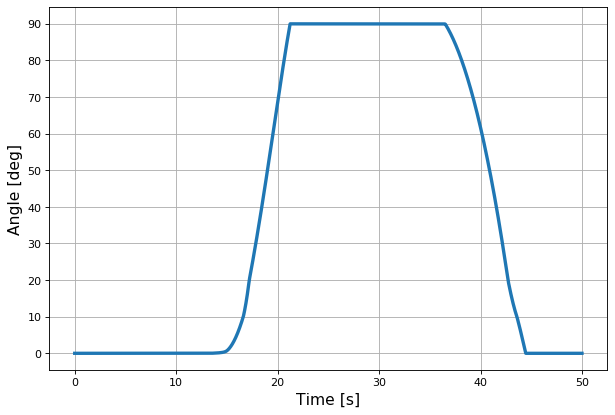

In [49]:
plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(times_control['EXP1'].values, angles_control['EXP1'].values, linewidth=3)
plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('Angle [deg]',fontsize=14)
plt.grid('on')
plt.yticks(np.arange(0, 100, step=10))
plt.show() # unnecessary in Jupyter, but it supresses some figure outputs 

A figura mostra que a válvula se inicia fechada, a zero graus em relação ao fluxo de ar. Então, ela inicia sua abertura, que é completada quando a válvula atinge 90 graus em relação ao fluxo de ar. Logo depois, a válvula fecha novamente. Este comportamento é alterado pelas falhas. Porém, visualizar tal efeito por uma tabela pode ser difícil.

Assim, vamos explorar de maneira gráfica diferentes casos para realmente ver a diferença.

A figura a seguir ilustra alguns casos de anormalidade em relação a um caso de operação normal.

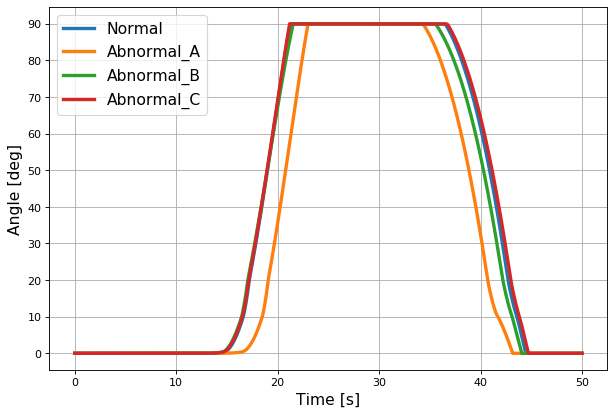

In [51]:
plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(times_control['EXP1'].values,angles_control['EXP1'].values,linewidth=3,label='Normal')
plt.plot(times_fail_A['EXP1'].values,angles_fail_A['EXP1'].values,linewidth=3,label='Abnormal_A')
plt.plot(times_fail_B['EXP1'].values,angles_fail_B['EXP1'].values,linewidth=3,label='Abnormal_B')
plt.plot(times_fail_C['EXP1'].values,angles_fail_C['EXP1'].values,linewidth=3,label='Abnormal_C')
plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('Angle [deg]',fontsize=14)
plt.yticks(np.arange(0, 100, step=10))
plt.grid('on')
plt.legend(fontsize=14)
plt.show()

Como pode ser percebido, um comportamento anormal pode ou não alterar a forma como a válvula opera. Devemos aprofundar nossa análise exploratória de dados para obtermos maneiras de classificar estes dados. O próximo passo, do ponto de vista de classificação de dados, seria extrair um conjunto de características de cada curva que seja capaz de descrever os dados com menos informações, tornando-os mais fáceis de visualizar e interpretar.

Em conversas com especialistas, a maioria das falhas altera os instantes em que a válvula começa a abrir e fechar, como se o sistema ficasse amortecido ou fosse inserido um atraso em seu movimento. Dessa maneira, foram selecionados quatro características.

- Instante em que a válvula atinge 10% de sue intervalo de curso (ao abrir)
- Instante em que a válvula atinge 90% de sue intervalo de curso (ao abrir)
- Instante em que a válvula atinge 90% de sue intervalo de curso (ao fechar)
- Instante em que a válvula atinge 10% de sue intervalo de curso (ao fechar)

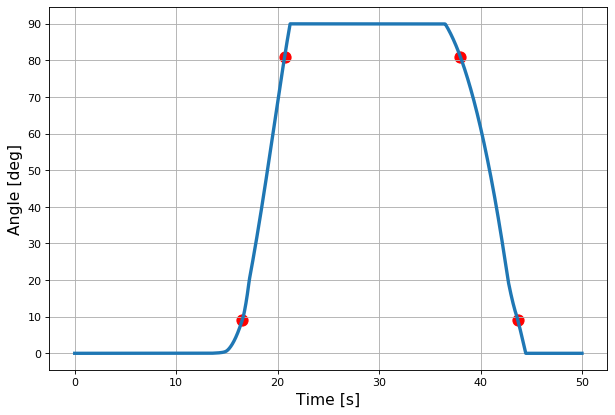

In [57]:
np.warnings.filterwarnings('ignore') # just to turn off numpy warnings about NaNs being in the vector

index10percent = np.where(angles_control['EXP1'].values >= 9)
indexFirst = index10percent[0][0]
indexLast = index10percent[0][-1]
time1 = times_control['EXP1'].values[indexFirst]
time4 = times_control['EXP1'].values[indexLast]
angle1 = angles_control['EXP1'].values[indexFirst]
angle4 = angles_control['EXP1'].values[indexLast]

index90percent = np.where(angles_control['EXP1'].values >= 81)
indexFirst = index90percent[0][0]
indexLast = index90percent[0][-1]
time2 = times_control['EXP1'].values[indexFirst]
time3 = times_control['EXP1'].values[indexLast]
angle2 = angles_control['EXP1'].values[indexFirst]
angle3 = angles_control['EXP1'].values[indexLast]

plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(times_control['EXP1'].values,angles_control['EXP1'].values,linewidth=3)
plt.scatter(time1,angle1,s=100,color='r')
plt.scatter(time2,angle2,s=100,color='r')
plt.scatter(time3,angle3,s=100,color='r')
plt.scatter(time4,angle4,s=100,color='r')
plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('Angle [deg]',fontsize=14)
plt.yticks(np.arange(0, 100, step=10))
plt.grid('on')
plt.show()

Estes pontos serão os dados <em>tidy</em>. O segmento a seguir separa os quatro pontos para todas as curvas de todos as classes.

In [88]:
param1 = list()
param2 = list()
param3 = list()
param4 = list()

param1_fail_A = list()
param2_fail_A = list()
param3_fail_A = list()
param4_fail_A = list()

param1_fail_B = list()
param2_fail_B = list()
param3_fail_B = list()
param4_fail_B = list()

param1_fail_C = list()
param2_fail_C = list()
param3_fail_C = list()
param4_fail_C = list()

for i in angles_control.columns:
    isMore = angles_control[i] >= 9
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param1.append(times_control[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param4.append(times_control[i].values[auxIndexLast])
    
    isMore = angles_control[i] >= 81
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param2.append(times_control[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param3.append(times_control[i].values[auxIndexLast])
    
for i in angles_fail_A.columns:
    isMore = angles_fail_A[i] >= 9
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param1_fail_A.append(times_fail_A[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param4_fail_A.append(times_fail_A[i].values[auxIndexLast])
    
    isMore = angles_fail_A[i] >= 81
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param2_fail_A.append(times_fail_A[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param3_fail_A.append(times_fail_A[i].values[auxIndexLast])
    
for i in angles_fail_B.columns:
    isMore = angles_fail_B[i] >= 9
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param1_fail_B.append(times_fail_B[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param4_fail_B.append(times_fail_B[i].values[auxIndexLast])
    
    isMore = angles_fail_B[i] >= 81
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param2_fail_B.append(times_fail_B[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param3_fail_B.append(times_fail_B[i].values[auxIndexLast])
    
for i in angles_fail_B.columns:
    isMore = angles_fail_C[i] >= 9
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param1_fail_C.append(times_fail_C[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param4_fail_C.append(times_fail_C[i].values[auxIndexLast])
    
    isMore = angles_fail_C[i] >= 81
    auxIndex = np.where(isMore == True)
    auxIndexFirst = auxIndex[0][0]
    param2_fail_C.append(times_fail_C[i].values[auxIndexFirst])
    auxIndexLast = auxIndex[0][-1]
    param3_fail_C.append(times_fail_C[i].values[auxIndexLast])

In [125]:
control = [param1,param2,param3,param4]
control = pd.DataFrame(control)
control = control.transpose()
control.columns = ['T1', 'T2', 'T3', 'T4']
control['Class'] = 'Control'

fail_A = [param1_fail_A,param2_fail_A,param3_fail_A,param4_fail_A]
fail_A = pd.DataFrame(fail_A)
fail_A = fail_A.transpose()
fail_A.columns = ['T1', 'T2', 'T3', 'T4']
fail_A['Class'] = 'Fail_A'

fail_B = [param1_fail_B,param2_fail_B,param3_fail_B,param4_fail_B]
fail_B = pd.DataFrame(fail_B)
fail_B = fail_B.transpose()
fail_B.columns = ['T1', 'T2', 'T3', 'T4']
fail_B['Class'] = 'Fail_B'

fail_C = [param1_fail_C,param2_fail_C,param3_fail_C,param4_fail_C]
fail_C = pd.DataFrame(fail_C)
fail_C = fail_C.transpose()
fail_C.columns = ['T1', 'T2', 'T3', 'T4']
fail_C['Class'] = 'Fail_C'

# Concatenate all
valve = pd.concat([control, fail_A, fail_B, fail_C], ignore_index=True)

Vamos verificar o início de cada classe, a fim de buscar uma identificação para cada uma apenas olhando os dados.

In [119]:
control.head()

,T1,T2,T3,T4,Class
0,16.503578,20.689979,38.012834,43.680915,Control
1,16.261352,20.398301,38.385202,43.879878,Control
2,16.242070,20.342076,38.356445,43.792061,Control
3,16.342218,20.466449,38.237122,43.752805,Control
4,16.491591,20.687623,38.036175,43.697382,Control


In [120]:
fail_A.head()

,T1,T2,T3,T4,Class
0,18.373327,22.454255,35.916923,41.896816,Fail_A
1,18.151718,22.293802,36.038917,41.971630,Fail_A
2,16.495901,20.600739,38.075461,43.547773,Fail_A
3,17.607627,21.780723,36.631079,42.458077,Fail_A
4,19.246814,23.278293,35.022805,41.313756,Fail_A


In [121]:
fail_B.head()

,T1,T2,T3,T4,Class
0,16.337209,20.875798,37.235622,43.209692,Fail_B
1,16.417775,20.954640,37.145286,43.121147,Fail_B
2,16.497066,21.031665,37.083236,43.098713,Fail_B
3,16.354333,20.636907,37.829919,43.572556,Fail_B
4,16.345662,20.597100,37.954800,43.634887,Fail_B


In [122]:
fail_C.head()

,T1,T2,T3,T4,Class
0,16.418047,20.650961,38.232448,43.934940,Fail_C
1,16.553202,20.886575,38.219461,44.067707,Fail_C
2,16.653509,21.241561,38.553319,44.804557,Fail_C
3,16.602444,20.956056,38.149095,44.067936,Fail_C
4,16.854643,21.566594,38.349987,44.886032,Fail_C


Aparentemente, as características se mantém muito semelhantes para cada classe, exceto a falha A, que altera o T1 e o T4 substancialmente. Vamos filtrar por T1 maior do que 17 e verificar a qual classe pertence.

In [130]:
isFailA = valve['T1'] > 17
valve_failA = valve[isFailA]
print(valve_failA['Class'].values)

['Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A'
 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A'
 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A'
 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A'
 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A' 'Fail_A'
 'Fail_A']


Aparentemente um modelo simples é capaz de separar esta classe com facilidade. Só de olhar os dados, é possível concluir que uma válvula com T1 maior do que 17 provavelmente possui falha do tipo A. Vamos verificar a acurácia deste modelo simplificado. 

In [145]:
valve_failA.shape[0]/fail_A.shape[0]

0.82

Ótimo, estamos certos 82% do tempo apenas olhando as tabelas. Porém, os outros dados estão agrupados muito juntos, dificultando este tipo de análise. Vamos tentar ver um sumário com algumas descrições estatísticas de cada classe, a fim de identificar possíveis diferenciais.

In [153]:
control.describe()

,T1,T2,T3,T4
count,50.000000,50.000000,50.000000,50.000000
mean,16.341842,20.482567,38.225364,43.749528
std,0.080084,0.110212,0.132767,0.065329
min,16.191275,20.293536,37.953522,43.637155
25%,16.284956,20.403630,38.105824,43.713110
50%,16.338694,20.475718,38.239216,43.736603
75%,16.392656,20.563006,38.333976,43.781852
max,16.524777,20.747185,38.450903,43.885542


In [149]:
fail_A.describe()

,T1,T2,T3,T4
count,50.000000,50.000000,50.000000,50.000000
mean,17.823451,21.935720,36.505434,42.337819
std,0.837831,0.819427,0.933320,0.702010
min,16.412127,20.566093,34.603749,41.000000
25%,17.224807,21.431087,35.865220,41.859429
50%,17.777258,21.879585,36.552742,42.325409
75%,18.416222,22.494186,37.075935,42.878913
max,19.548704,23.601799,38.105173,43.623016


In [150]:
fail_B.describe()

,T1,T2,T3,T4
count,50.000000,50.000000,50.000000,50.000000
mean,16.373961,20.766470,37.544197,43.374399
std,0.097153,0.185557,0.363273,0.200418
min,16.180728,20.342790,36.693622,42.891684
25%,16.316362,20.640841,37.292946,43.214101
50%,16.370944,20.754435,37.537380,43.340654
75%,16.417365,20.886521,37.840414,43.581976
max,16.603123,21.213703,38.398511,43.827138


In [151]:
fail_C.describe()

,T1,T2,T3,T4
count,50.000000,50.000000,50.000000,50.000000
mean,16.505716,20.915671,38.537722,44.467710
std,0.120811,0.238631,0.190549,0.322691
min,16.230461,20.445753,38.083860,43.868491
25%,16.437159,20.771807,38.411105,44.212005
50%,16.492672,20.906109,38.531244,44.465456
75%,16.579146,21.049918,38.674426,44.706200
max,16.854643,21.566594,39.022961,45.046891


Realmente, a classe de falha A se destaca, enquanto as outras mantém valores semelhantes. Vamos tentar visualizar graficamente.

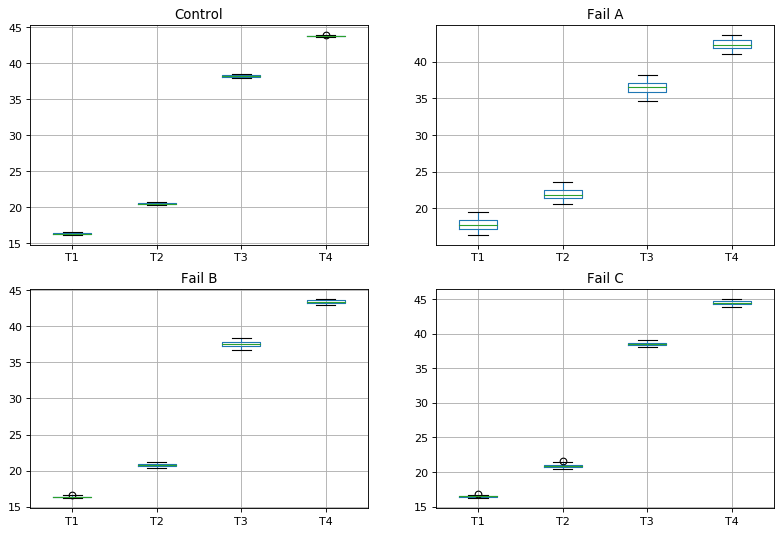

In [160]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221)
plt.title('Control')
control.boxplot()

plt.subplot(222)
plt.title('Fail A')
fail_A.boxplot()

plt.subplot(223)
plt.title('Fail B')
fail_B.boxplot()

plt.subplot(224)
plt.title('Fail C')
fail_C.boxplot()

Analisando os gráficos, é possível ver que a válvula da classe de controle possui valores menos distribuídos, porém com pequena diferença. Vamos ilustrar os histogramas para cada classe considerando apenas o atributo T4.

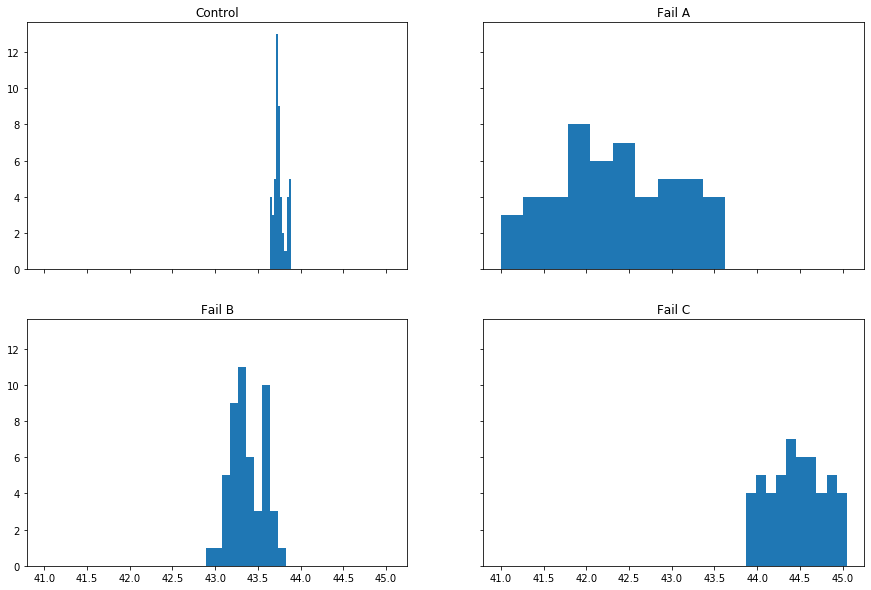

In [202]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))

#plt.subplot(221)
axes[0, 0].hist(control['T4'].values)
axes[0, 0].title.set_text('Control')

#plt.subplot(222)
axes[0, 1].hist(fail_A['T4'].values)
axes[0, 1].title.set_text('Fail A')

#plt.subplot(223)
axes[1, 0].hist(fail_B['T4'].values)
axes[1, 0].title.set_text('Fail B')

#plt.subplot(224)
axes[1, 1].hist(fail_C['T4'].values)
axes[1, 1].title.set_text('Fail C')

Agora é muito mais fácil de perceber o que ocorre no parâmetro T4 ao obter diferentes falhas. A classe de controle possui todos os valores entre 43.5 e 44. Contudo, as outras classes também contém valores neste intervalo. Se aplicarmos o mesmo método utilizado anteriormente, podemos ter conclusões erradas ou sem significado.

In [226]:
isControl = valve[(valve.T4 > 43.5) & (valve.T4 < 44)]
isControl['Class'].describe()

count          73
unique          4
top       Control
freq           50
Name: Class, dtype: object

Então existem 73 objetos de quatro classes diferentes. Pelo histograma, é possível afirmar que destes, 50 são da classe "controle", pois nos dados originais, temos 50 de cada classe. O erro para esta análise é bem maior, por volta de 31%. Podemos fazer melhor, vamos implementar um algoritmo de apredizado de máquina. 

Para tanto, é necessário dividir os dados entre treinamento e teste. A entrada do algoritmo serão os tempos T1 a T4 e a saída será a classe. O algoritmo é supervisionado.

In [237]:
x = valve.drop('Class',axis=1)
y = valve['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

Com os conjunto de treinamento e teste separados, podemos implementar o aprendizado. Para este exemplo, foi selecionado uma Rede Neural Artificial, mais especificamente um perceptron de multi-camadas.

In [238]:
mlp = MLPClassifier(hidden_layer_sizes=(4,16,4),max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [239]:
predictions = mlp.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 0  0  0 12]
 [ 0  9  0  1]
 [ 0  4  0  5]
 [ 0  0  0 19]]
              precision    recall  f1-score   support

     Control       0.00      0.00      0.00        12
      Fail_A       0.69      0.90      0.78        10
      Fail_B       0.00      0.00      0.00         9
      Fail_C       0.51      1.00      0.68        19

    accuracy                           0.56        50
   macro avg       0.30      0.47      0.37        50
weighted avg       0.33      0.56      0.41        50



É possível perceber o péssimo desempenho dos classificador. Tal fato pode ser atribuído à pouca quantidade de dados de entrada. Sem dados o suficiente, não é possível separar (neste caso) uma classe da outra. Temos à disposição outro conjunto de dados, de mesma origem, porém já tratados. As características já foram extraídas e os dados já estão normalizados no intervalo [-1, 1].

Os motivos para tanto são: tentativa de mascarar dados que não podem ser compartilhados e limite do tamanho do arquivo a ser colocado no GitHub.

In [231]:
valve_data = pd.read_csv('data/valve_data.csv',names=['T1', 'T2', 'T3', 'T4', 'Class'])

In [234]:
x = valve_data.drop('Class',axis=1)
y = valve_data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

mlp = MLPClassifier(hidden_layer_sizes=(4,16,4),max_iter=500)
mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[502   0   0   4]
 [  0 456   0  51]
 [  0   2 506  15]
 [  0  91   0 373]]
              precision    recall  f1-score   support

    Friction       1.00      0.99      1.00       506
     Healthy       0.83      0.90      0.86       507
        Leak       1.00      0.97      0.98       523
      Spring       0.84      0.80      0.82       464

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



Agora parece muito melhor. Uma maior massa de dados torna possível tirar conclusões mais incisivas.